In [206]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Neighbour 

CO24BTECH11009 Name - Sreeteja

## Question 1

Analytical sol 

$$    \theta = \theta_0  sin(\omega t)  +  \frac{\omega_0}{\omega}cos(\omega t)   $$

### b

In [207]:
theta0 = 0.01 #radians
omega0 = 2 #rad s^-1
g = 1.
L = 1.
nt = 100000
dt = 0.001

t = np.linspace(0,nt*dt,nt+1)

theta = np.zeros_like(t,dtype=np.float32)
omega = np.zeros_like(t,dtype=np.float32)
theta[0] = theta0
omega[0] = omega0

acceleration = lambda theta: -(g/L)*theta
acc = acceleration(theta[0])

In [208]:
for i in tqdm(range(1,nt+1)):
    omega_half = omega[i-1] + 0.5*acc*dt
    theta[i] = theta[i-1] + omega_half*dt
    acc = acceleration(theta[i])
    omega[i] = omega_half + 0.5*acc*dt


100%|██████████| 100000/100000 [00:00<00:00, 1239744.62it/s]


#### i

In [209]:
# angular momentum = I*omega
#I = m*l^2

m =1.
I = m*L**2
ang_mom = I*omega

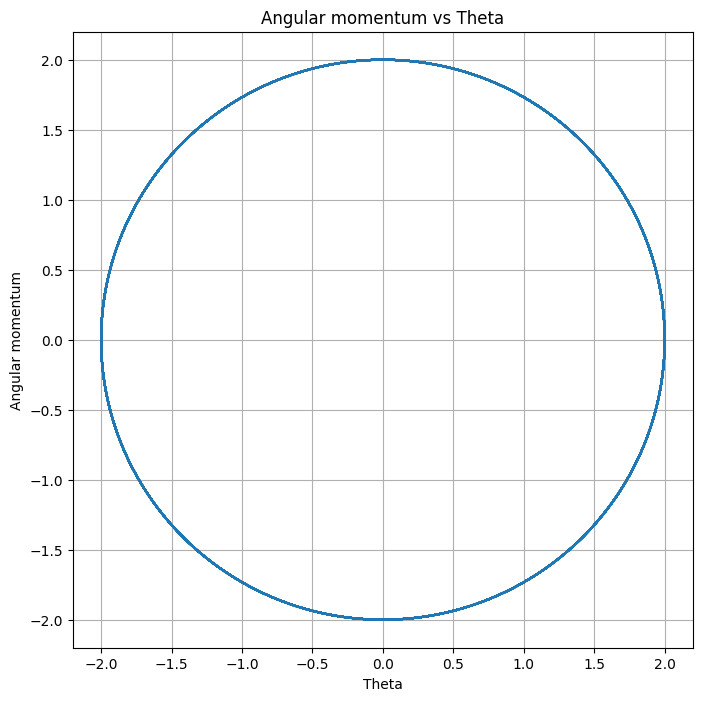

In [210]:
plt.figure(figsize=(8,8))
plt.plot(theta,ang_mom)
plt.title('Angular momentum vs Theta')
plt.grid()
plt.xlabel("Theta")
plt.ylabel("Angular momentum")
plt.show()

For an Simple harmonic Motion the variation of the angular momentum vs the displacement plot is a circle. which is exactly what we got

#### ii

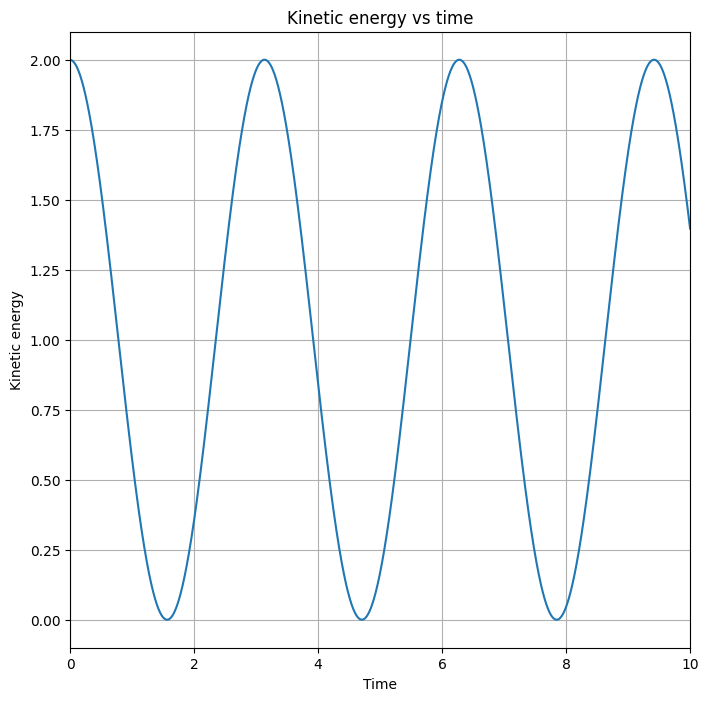

In [211]:
#ke = 1/2*I*omega**2

ke = 0.5*I*omega**2
plt.figure(figsize=(8,8))
plt.plot(t,ke)
plt.title('Kinetic energy vs time')
plt.grid()
plt.xlim(0,10)
plt.xlabel("Time")
plt.ylabel("Kinetic energy")
plt.show()

The kinetic energy is oscillating in our plot, which is what we observe in a simple harmonic motion


In our analytical solution we will obtain omega as a function of sine and cosine and hence the Kinetic energy should also be oscillating which is what we get

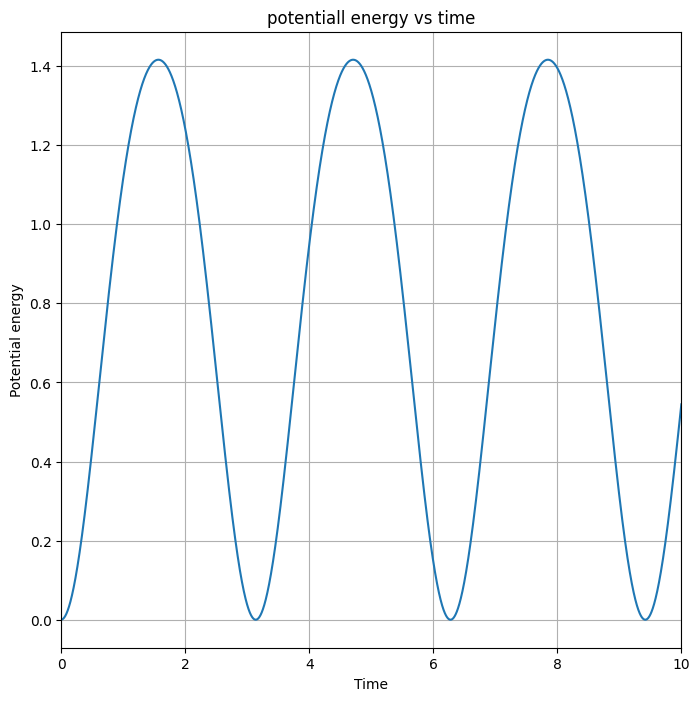

In [212]:
#pe = mgh
# = L - Lcostheta

pe = m*g*L*(1 - np.cos(theta))
plt.figure(figsize=(8,8))
plt.plot(t,pe)
plt.title('potentiall energy vs time')
plt.grid()
plt.xlim(0,10)
plt.xlabel("Time")
plt.ylabel("Potential energy")
plt.show()

Our analytical solution will tell us that theta is a function of sine and cosine.

this means that potential energy is also a function of sine and cosine which means it should be oscillating.

This is what we get in our plot

### c

From our previous derivation we got the differential equation

$$ \frac{d^2\theta}{d\theta^2} = -\frac{g}{l}\theta $$

- now if there is a drag force then there will be another torque due the drag force
- I assume the drag acts exactly opposite to the direction of motion of the pendulum
- let the drag force be Fd
- $$ F_d = -bL\dot{\theta} $$
- Torque due to this force is 
- $$ \Tau = -L*F_d $$
- adding this to the equation 
- $$ \Sigma\tau = I\alpha $$
- $$ I\alpha = -L*F_d  - mglsin(\theta)$$
- $$ I = mL^2 $$
- $$ alpha = \frac{d^2\theta}{d\theta^2} $$
- therfore 
- $$ \frac{d^2\theta}{d\theta^2} = -\frac{g}{l} \theta - \frac{-bL^2\dot{\theta}}{m} $$
- hence this is the required DE


In [213]:
theta0 = 0.01 #radians
omega0 = 2 #rad s^-1
g = 1.
L = 1.
nt = 100000
dt = 0.001
b = 0.01
m =1
t = np.linspace(0,nt*dt,nt+1)

theta = np.zeros_like(t,dtype=np.float32)
omega = np.zeros_like(t,dtype=np.float32)
theta[0] = theta0
omega[0] = omega0

acceleration = lambda theta,omega: -(g/L)*theta - (b*L**2*omega)/m
acc = acceleration(theta[0],omega[0])

I have taken b value to ba small so that the motion doesnt imediately come to a halt
for a b value the system will come to rest very quickly

In [214]:
for i in tqdm(range(1,nt+1)):
    omega_half = omega[i-1] + 0.5*acc*dt
    theta[i] = theta[i-1] + omega_half*dt
    acc = acceleration(theta[i],omega_half)
    omega[i] = omega_half + 0.5*acc*dt


100%|██████████| 100000/100000 [00:00<00:00, 959184.77it/s]


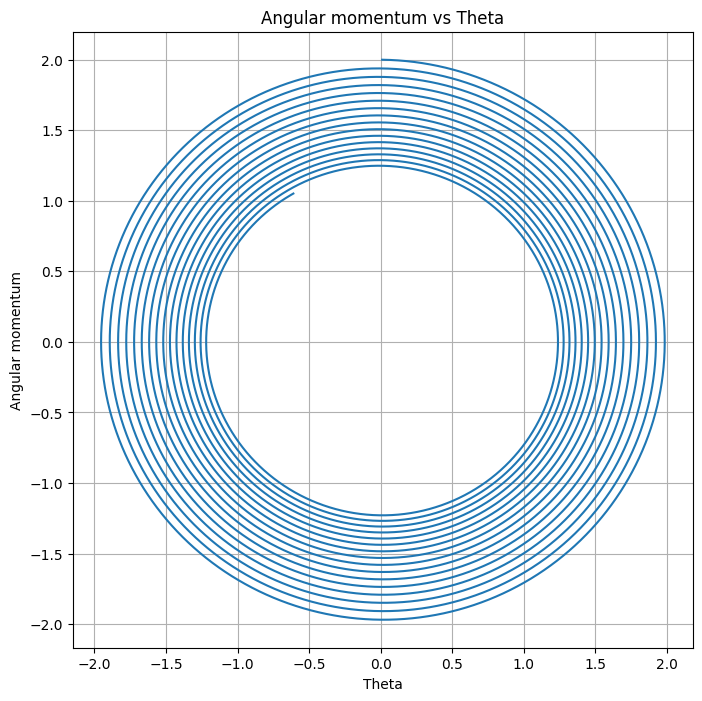

In [215]:
# angular momentum = I*omega
#I = m*l^2

m =1.
I = m*L**2
ang_mom = I*omega
plt.figure(figsize=(8,8))
plt.plot(theta,ang_mom)
plt.title('Angular momentum vs Theta')
plt.grid()
plt.xlabel("Theta")
plt.ylabel("Angular momentum")
plt.show()

Due to the drag force the angular momentum is decreasing as expected


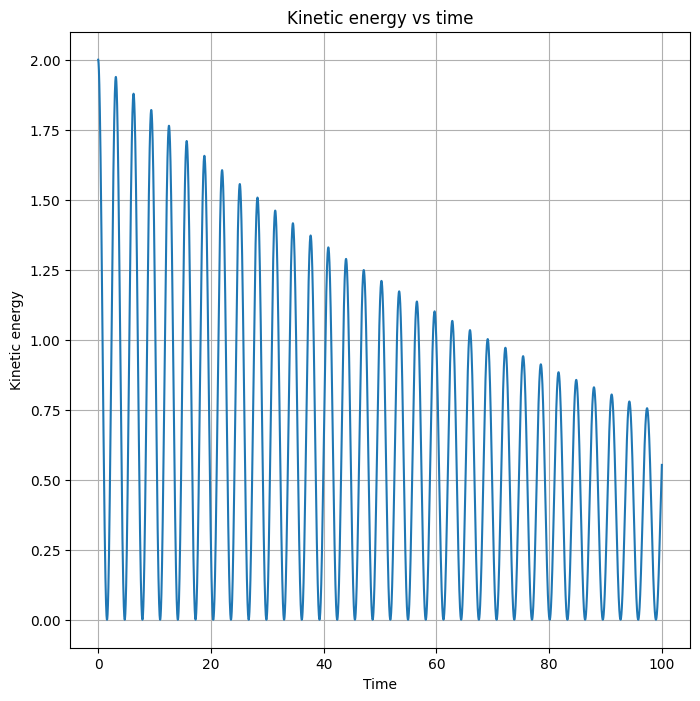

In [216]:
#ke = 1/2*I*omega**2

ke = 0.5*I*omega**2
plt.figure(figsize=(8,8))
plt.plot(t,ke)
plt.title('Kinetic energy vs time')
plt.grid()
# plt.xlim(0,10)
plt.xlabel("Time")
plt.ylabel("Kinetic energy")
plt.show()

Due to the drag force the ke is decreasing as expected


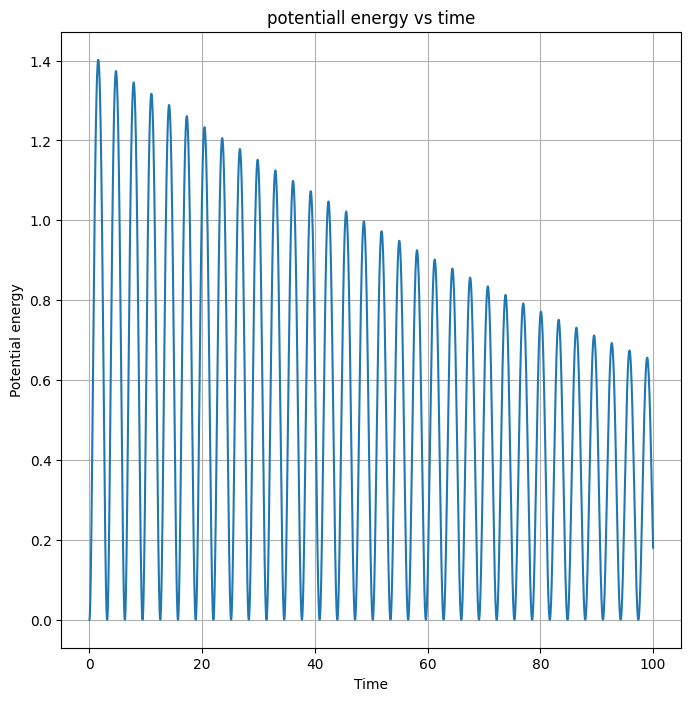

In [217]:
#pe = mgh
# = L - Lcostheta

pe = m*g*L*(1 - np.cos(theta))
plt.figure(figsize=(8,8))
plt.plot(t,pe)
plt.title('potentiall energy vs time')
plt.grid()
# plt.xlim(0,10)
plt.xlabel("Time")
plt.ylabel("Potential energy")
plt.show()

Due to the drag force the Potential energy is decreasing as expected


## Question 2

### a

In [218]:
L = 1.
nx = 50
x = np.linspace(0,L,nx+1)
dx= L/nx
nt = 1000

dt = 0.001
t = np.linspace(0.0,nt*dt,nt+1)

C = np.zeros(shape=(nx+1,nt+1))

C0 = 1

D0 = 0.15
F = D0*dt/dx**2

for i in range(x.size):
    if x[i] < L/2:
        C[i,0] = 0
    else :
        C[i,0] = C0

for j in range(1,nt+1):
    for i in range(1,nx):
        C[i,j] = C[i,j-1] + F*(C[i+1,j-1] + C[i-1,j-1] - 2*C[i,j-1])
    C[0,j] = C[1,j]
    C[-1,j] = C[-2,j]


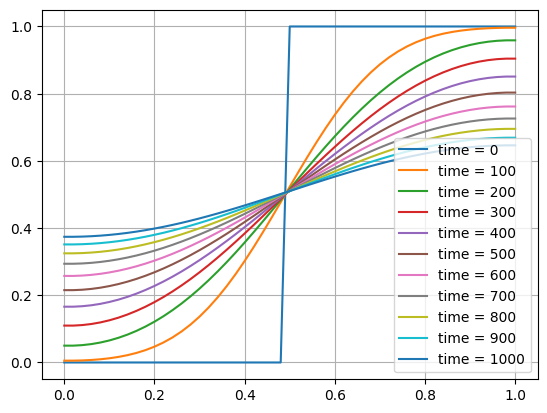

In [219]:
for j in range(0,nt+1):
    if j%100 == 0:
        plt.plot(x,C[:,j],label = f'time = {j}')
plt.grid()
plt.legend()
plt.show()

As we can see from the plot, the initial concentration levels which had a spike at x = L/2 are slowly smoothening out as time progresses.

This is exactly what we are supposed to get as long periods of time the entire domain will reach to an equilibrium concentration. Which is 0.5 for this case

### b

In [220]:
L = 1.
nx = 50
x = np.linspace(0,L,nx+1)
dx= L/nx
nt = 1000

dt = 0.001
t = np.linspace(0.0,nt*dt,nt+1)

C = np.zeros(shape=(nx+1,nt+1))

C0 = 1

D0 = 0.15
F = D0*dt/dx**2

for i in range(x.size):
    if x[i] < L/2:
        C[i,0] = 0
    else :
        C[i,0] = C0

for j in range(1,nt+1):
    for i in range(1,nx):
        C[i,j] = C[i,j-1] + F*(C[i+1,j-1] + C[i-1,j-1] - 2*C[i,j-1])*x[i]**2\
        + F*dx*x[i]*(C[i+1,j-1] - C[i-1,j-1])

    C[0,j] = C[1,j]
    C[-1,j] = C[-2,j]

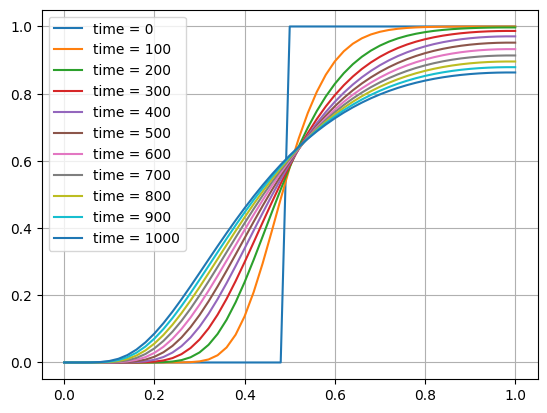

In [221]:
for j in range(0,nt+1):
    if j%100 == 0:
        plt.plot(x,C[:,j],label = f'time = {j}')
plt.grid()
plt.legend()
plt.show()

The plot has a similar to the first plot but there are a few key observations

- The distributions of concentration around the centre seem to be around 0.6
- This could be happening because for this case the rate of diffusion depends on the distance from the origin
- From our initial conditions the left half of the domain was at 0 concentration and right half at 1
- Now due to this varying rate of diffusion the left half of the domain is diffusing slower than the right half
- This implies the contribution of concentration from the right half is more, and since it is at a higher value the concentration around the middle point should be higher than what we got from the last plot i.e around 0.5.
- This is what we observe in our plot. The concentration of the middle section is arounf 0.6 

### for mass

In [222]:
np.sum(C[:,0])

np.float64(26.0)

In [223]:
np.sum(C[:,-1])

np.float64(25.863096912867512)

I am taking each grid in the domain to be of unit volume and multiipyling it with concentration

Now we know that 
$$m = c*V $$

Now I am adding the mass `dm` of all grids at `t= 0` to get an initial mass
I am now doing the same for all grids at `t= nt*dt ` to get the final mass

As we can see the there is a small change in mass in the final mass. This implies that with our boundary conditions mass is not conserved